In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel("Data/2017_PM10_1g.xlsx") # load

In [3]:
df.iloc[0,:]

Nr          Kod stacji
1         DsBoleslaMOB
2         DsDzialoszyn
3         DsDziePilsud
4         DsJelGorOgin
5         DsKlodzSzkol
6          DsKudowaMOB
7         DsLegAlRzecz
8         DsNowRudSreb
9         DsWalbrzWyso
10        DsWrocWybCon
11        DsZabkPowWar
12        KpBydPlPozna
13        KpBydWarszaw
14        KpGrudPilsud
15        KpInowSolank
16        KpToruDziewu
17        KpToruKaszow
18        KpToruWSikor
19     KpWloclChelmMOB
20        KpWloclOkrze
21        LbLubObywate
22        LbZamoHrubie
23        LdGajewUjWod
24        LdLodzCzerni
25        LdLodzGdansk
26        LdLodzJanPaw
27        LdLodzKilins
28        LdPabiKonsta
29        LdPioTrKraPr
            ...       
94        SlBielKossak
95        SlCiesMickie
96        SlCzestoArmK
97        SlCzestoBacz
98        SlDabro1000L
99        SlGliwicMewy
100       SlKatoKossut
101       SlRybniBorki
102       SlSosnoLubel
103       SlTychyTolst
104       SlUstronSana
105       SlWodzGalczy
106       S

In [4]:
df.head()                             # look

,Nr,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,123
0,Kod stacji,DsBoleslaMOB,DsDzialoszyn,DsDziePilsud,DsJelGorOgin,DsKlodzSzkol,DsKudowaMOB,DsLegAlRzecz,DsNowRudSreb,DsWalbrzWyso,...,WpBoroDrapal,WpKaliSawick,WpKoniWyszyn,WpPilaKusoci,WpPoznDabrow,WpPoznPolank,ZpKoszArKraj,ZpSzczAndr01,ZpSzczecPrze,ZpSzczLacz04
1,Wskaźnik,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,...,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10
2,Czas uśredniania,1g,1g,1g,1g,1g,1g,1g,1g,1g,...,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g
3,Jednostka,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,...,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3
4,Kod stanowiska,DsBoleslaMOB-PM10-1g,DsDzialoszyn-PM10-1g,DsDziePilsud-PM10-1g,DsJelGorOgin-PM10-1g,DsKlodzSzkol-PM10-1g,DsKudowaMOB-PM10-1g,DsLegAlRzecz-PM10-1g,DsNowRudSreb-PM10-1g,DsWalbrzWyso-PM10-1g,...,WpBoroDrapal-PM10-1g,WpKaliSawick-PM10-1g,WpKoniWyszyn-PM10-1g,WpPilaKusoci-PM10-1g,WpPoznDabrow-PM10-1g,WpPoznPolank-PM10-1g,ZpKoszArKraj-PM10-1g,ZpSzczAndr01-PM10-1g,ZpSzczecPrze-PM10-1g,ZpSzczLacz04-PM10-1g


In [5]:
df.info()   # they are not stored as nunmeric data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8765 entries, 0 to 8764
Columns: 124 entries, Nr to 123
dtypes: object(124)
memory usage: 8.3+ MB


# Select best stations

In [6]:
count_nans = df.iloc[5:, 2:].isna().sum()
best_stations_index = count_nans.nsmallest(10).index
best_stations = df[best_stations_index].iloc[5:,:]
best_stations.columns = df[best_stations_index].loc[[0]].values[0]
best_stations.head()

,MpTarRoSitko,SlTychyTolst,ZpKoszArKraj,MpNoSaczNadb,ZpSzczecPrze,MpKrakAlKras,PmGdaKacze02,SlWodzGalczy,SlRybniBorki,MzPlocMiReja
5,"286,547","43,767","24,221","430,315","20,2558","213,733","22,1","97,5863","56,9406","49,591231"
6,"277,584","36,3929","24,9919","289,301","17,4999","213,868","11,9","97,6305","60,6056","39,695604"
7,"294,011","38,949","15,8157","251,635","8,88873","221,923","4,8","66,6252","54,7129","39,695604"
8,"234,649","39,6057","9,87341","235,258","7,46767","244,69","5,1","53,7598","47,2334","39,695604"
9,"196,482","37,7051","13,6186","189,809","8,14248","224,673","5,1","48,948","42,1408","39,695604"


# Preprocessing

In [7]:
def preprocessData(data):
    data_dot = data.str.replace(",",".")
    data_numeric = pd.to_numeric(data_dot)

In [8]:
best_stations_df = pd.DataFrame([pd.to_numeric(best_stations[station].str.replace(",",".")) for station in best_stations])
best_stations_df = best_stations_df.transpose()
best_stations_df.head()

,MpTarRoSitko,SlTychyTolst,ZpKoszArKraj,MpNoSaczNadb,ZpSzczecPrze,MpKrakAlKras,PmGdaKacze02,SlWodzGalczy,SlRybniBorki,MzPlocMiReja
5,286.547,43.7670,24.22100,430.315,20.25580,213.733,22.1,97.5863,56.9406,49.591231
6,277.584,36.3929,24.99190,289.301,17.49990,213.868,11.9,97.6305,60.6056,39.695604
7,294.011,38.9490,15.81570,251.635,8.88873,221.923,4.8,66.6252,54.7129,39.695604
8,234.649,39.6057,9.87341,235.258,7.46767,244.690,5.1,53.7598,47.2334,39.695604
9,196.482,37.7051,13.61860,189.809,8.14248,224.673,5.1,48.9480,42.1408,39.695604


# Plotting

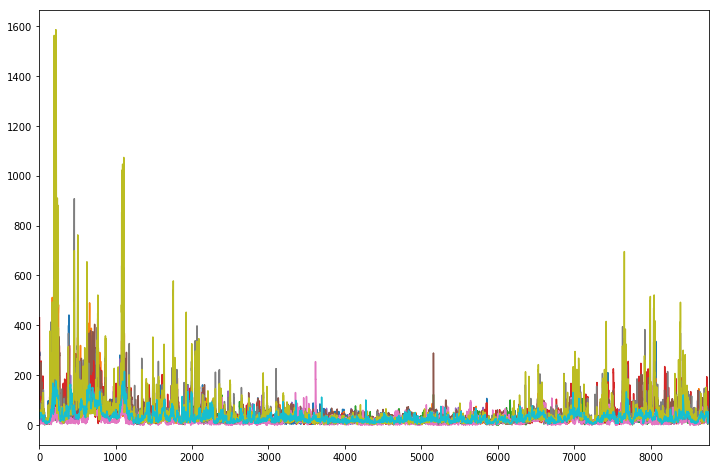

In [9]:
for station in best_stations_df:
    best_stations_df[station].plot(figsize=(12,8))

In [10]:
best_stations_df.isna().sum()

MpTarRoSitko     3
SlTychyTolst    10
ZpKoszArKraj    16
MpNoSaczNadb    18
ZpSzczecPrze    20
MpKrakAlKras    21
PmGdaKacze02    27
SlWodzGalczy    30
SlRybniBorki    35
MzPlocMiReja    38
dtype: int64

# Handling missing values
I take the simplest approach and take mean of two neighbours

In [11]:
for i in best_stations_df['MpTarRoSitko'][best_stations_df['MpTarRoSitko'].isna()].index:
    if not(np.isnan(best_stations_df['MpTarRoSitko'].loc[i-1]) or np.isnan(best_stations_df['MpTarRoSitko'].loc[i+1])):
        best_stations_df['MpTarRoSitko'].loc[i] = (best_stations_df['MpTarRoSitko'].loc[i-1] + best_stations_df['MpTarRoSitko'].loc[i+1])/2

In [12]:
sum(best_stations_df['MpTarRoSitko'].isna())

0

# Moving average

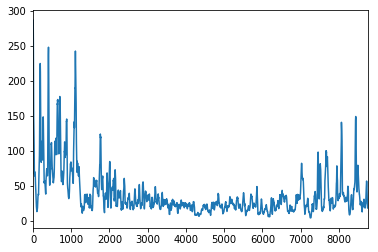

In [31]:
best_stations_df['MpTarRoSitko'].rolling(24, min_periods=1).mean().plot()

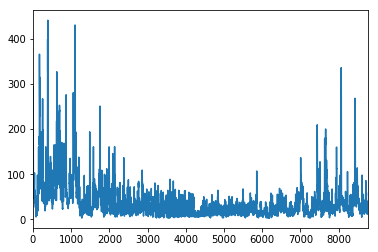

In [32]:
best_stations_df['MpTarRoSitko'].plot()

In [39]:
print('lenght = ',len(best_stations_df['MpTarRoSitko'].rolling(24, min_periods=1).mean()))
print('no of na = ', best_stations_df['MpTarRoSitko'].rolling(24, min_periods=1).mean().isna().sum())

lenght =  8760
no of na =  0


# Average for each day

In [17]:
best_station_arr = best_stations_df['MpTarRoSitko'].values.reshape(365,24)
f'shape = {best_station_arr.shape} type = {type(best_station_arr)}'

"shape = (365, 24) type = <class 'numpy.ndarray'>"

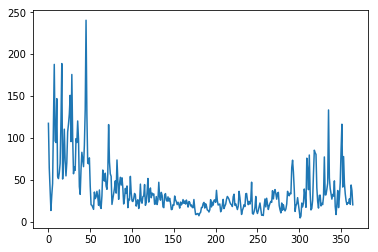

In [18]:
daily_arr = np.mean(best_station_arr, axis=1)
plt.plot(daily_arr)

In [19]:
len(daily_arr)

365